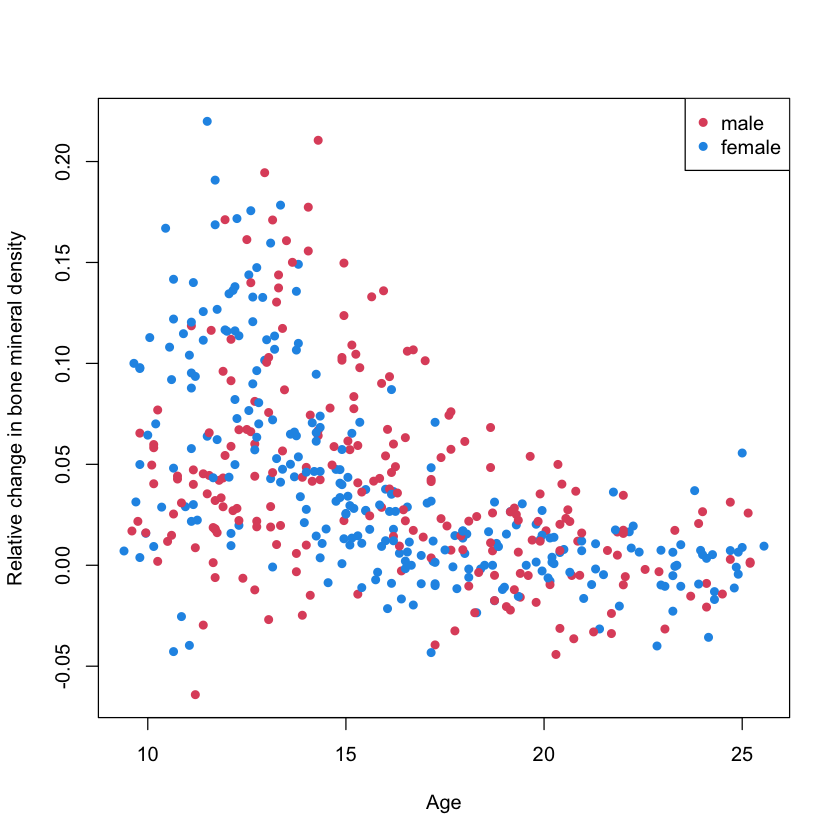

In [5]:
# =============================================
# Bone mineral density data
# =============================================
#
# Summary: 
# These are records of bone mineral density (BMD) in 
# adolescents, and how it changes depending on age 
# and gender
# 
#
# Data description: 
# The data set consists of the following 3 variables
# Response variable:
#  spnbmd: relative change in spinal BMD over two consecutive visits
# Covariates:
#  age: age in years
#  gender (male/femal)
#
#======================================================

# reading data
bone = read.table("http://www.uio.no/studier/emner/matnat/math/STK2100/data/bone.data", header = TRUE)

# plotting data
col.vec <- rep(2, nrow(bone))
col.vec[bone$gender == "female"] <- 4
par(bg = "white")
plot(bone$age, bone$spnbmd, col = col.vec, pch = 16, xlab = "Age", ylab = "Relative change in bone mineral density")
legend("topright", c("male", "female"), pch=rep(16, 2), col = c(2, 4))

In [10]:
# Fitting separate regression splines with df=12 to the two genders
library(splines)
d.pred = data.frame(age = sort(bone$age))
fit.m = lm(spnbmd ~ ns(age, df = 12), data = bone, subset = (gender == "male"))
pred.m = predict(fit.m, d.pred)
summary(fit.m)



Call:
lm(formula = spnbmd ~ ns(age, df = 12), data = bone, subset = (gender == 
    "male"))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.102030 -0.024522 -0.002441  0.020138  0.135007 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)
(Intercept)         0.046343   0.028881   1.605    0.110
ns(age, df = 12)1  -0.003826   0.027179  -0.141    0.888
ns(age, df = 12)2   0.036082   0.038387   0.940    0.348
ns(age, df = 12)3   0.021650   0.035245   0.614    0.540
ns(age, df = 12)4   0.033185   0.039035   0.850    0.396
ns(age, df = 12)5   0.026418   0.035446   0.745    0.457
ns(age, df = 12)6  -0.003647   0.036190  -0.101    0.920
ns(age, df = 12)7  -0.022546   0.035542  -0.634    0.527
ns(age, df = 12)8  -0.040189   0.033929  -1.184    0.238
ns(age, df = 12)9  -0.034675   0.035037  -0.990    0.323
ns(age, df = 12)10 -0.052606   0.031954  -1.646    0.101
ns(age, df = 12)11 -0.060555   0.071678  -0.845    0.399
ns(age, df = 12)12 -0.018291   0.027

In [11]:
fit.f = lm(spnbmd ~ ns(age, df = 12), data = bone, subset = (gender == "female"))
pred.f = predict(fit.f, d.pred)
summary(fit.f)


Call:
lm(formula = spnbmd ~ ns(age, df = 12), data = bone, subset = (gender == 
    "female"))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.118279 -0.017828  0.000419  0.017428  0.126909 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)   
(Intercept)         0.05103    0.01692   3.017  0.00283 **
ns(age, df = 12)1   0.05852    0.01932   3.030  0.00271 **
ns(age, df = 12)2   0.04487    0.02534   1.771  0.07785 . 
ns(age, df = 12)3   0.03481    0.02341   1.487  0.13830   
ns(age, df = 12)4  -0.02332    0.02469  -0.945  0.34579   
ns(age, df = 12)5  -0.02286    0.02346  -0.974  0.33089   
ns(age, df = 12)6  -0.04373    0.02391  -1.829  0.06867 . 
ns(age, df = 12)7  -0.04536    0.02472  -1.835  0.06776 . 
ns(age, df = 12)8  -0.04507    0.02375  -1.898  0.05891 . 
ns(age, df = 12)9  -0.04342    0.02416  -1.797  0.07356 . 
ns(age, df = 12)10 -0.06584    0.02065  -3.187  0.00162 **
ns(age, df = 12)11 -0.03519    0.04208  -0.836  0.40371   
ns(age, 

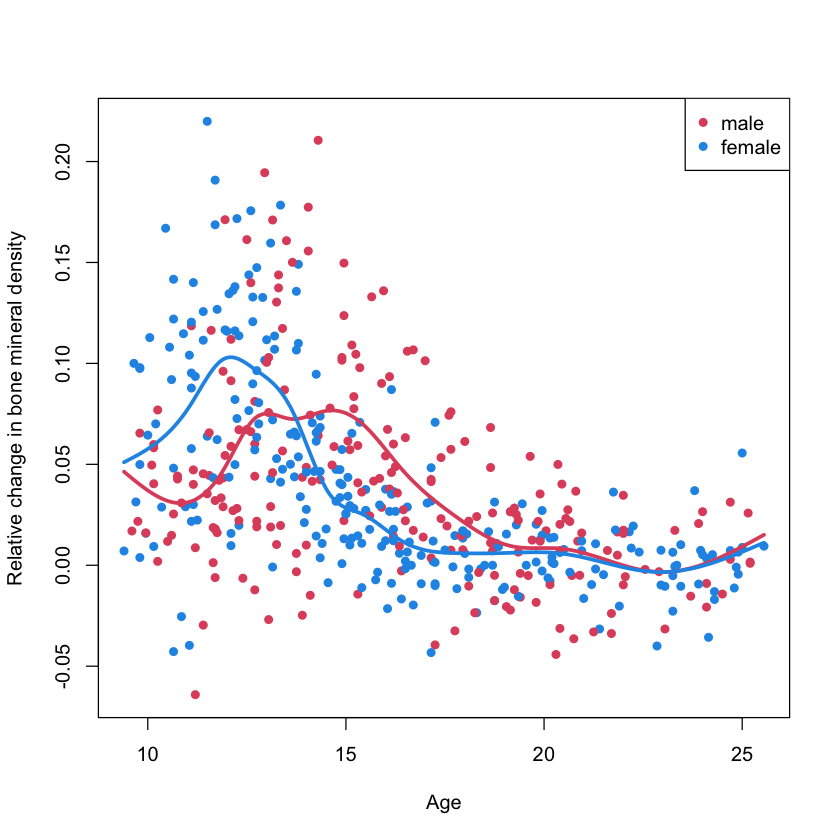

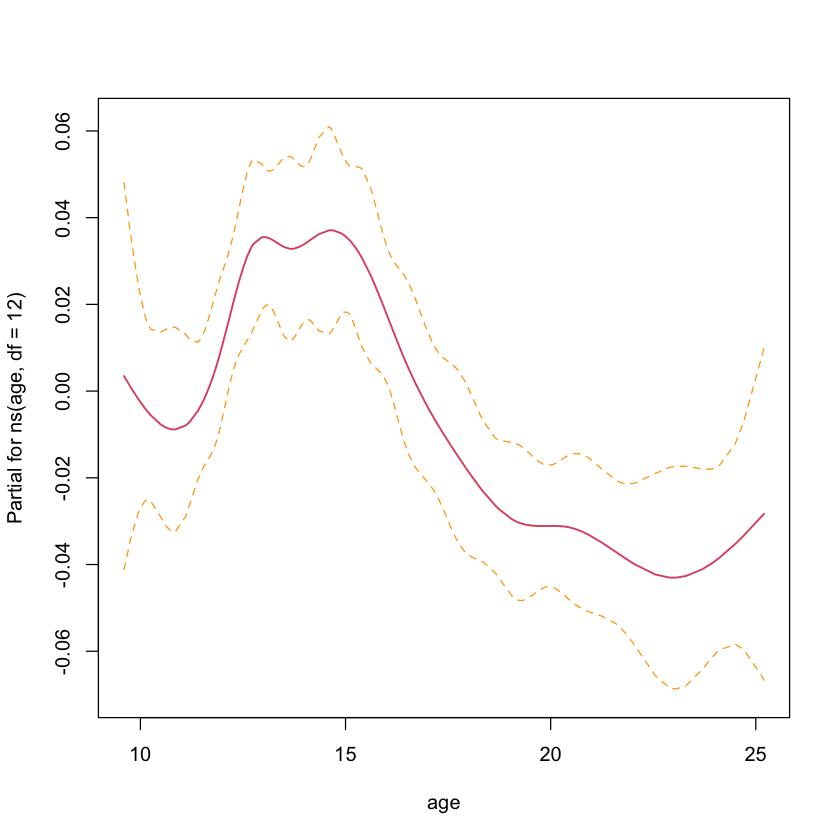

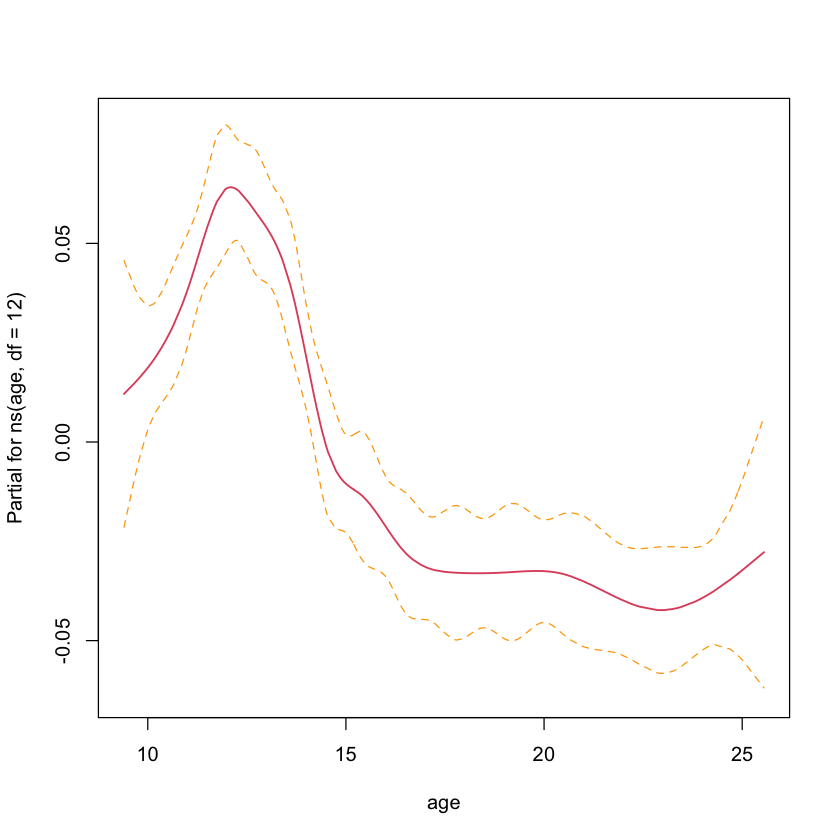

In [17]:
par(bg = "white")
plot(bone$age, bone$spnbmd, col = col.vec, pch = 16, xlab = "Age", ylab = "Relative change in bone mineral density")
legend("topright", c("male", "female"), pch=rep(16, 2), col = c(2, 4))
lines(d.pred$age, pred.m, type = "l", col = 2, lwd = 3)
lines(d.pred$age, pred.f, type = "l", col = 4, lwd = 3)
termplot(fit.m, se = TRUE)
termplot(fit.f, se = TRUE)

In [18]:
# selecting lambda to obtain df = 12
bone.m = bone[bone$gender == "male", ]
fit.m.s.df = smooth.spline(bone.m$age, bone.m$spnbmd, df = 12)
fit.m.s.df

Call:
smooth.spline(x = bone.m$age, y = bone.m$spnbmd, df = 12)

Smoothing Parameter  spar= 0.7272687  lambda= 0.0002210202 (15 iterations)
Equivalent Degrees of Freedom (Df): 12.00164
Penalized Criterion (RSS): 0.2535126
GCV: 0.001815321

In [19]:
bone.f = bone[bone$gender == "female", ]
fit.f.s.df = smooth.spline(bone.f$age, bone.f$spnbmd, df = 12)
fit.f.s.df

Call:
smooth.spline(x = bone.f$age, y = bone.f$spnbmd, df = 12)

Smoothing Parameter  spar= 0.7092026  lambda= 0.00024992 (14 iterations)
Equivalent Degrees of Freedom (Df): 11.99812
Penalized Criterion (RSS): 0.1593853
GCV: 0.001290244

In [21]:
# Select lambda using (generalised) cross validation
fit.m.s.cv = smooth.spline(bone.m$age, bone.m$spnbmd, cv=FALSE)
fit.m.s.cv
pred.m.cv = predict(fit.m.s.cv, d.pred)

Call:
smooth.spline(x = bone.m$age, y = bone.m$spnbmd, cv = FALSE)

Smoothing Parameter  spar= 0.9404764  lambda= 0.007678558 (13 iterations)
Equivalent Degrees of Freedom (Df): 5.559894
Penalized Criterion (RSS): 0.2623868
GCV: 0.001752048

In [22]:
fit.f.s.cv = smooth.spline(bone.m$age, bone.m$spnbmd, cv=FALSE)
fit.f.s.cv
pred.f.cv = predict(fit.f.s.cv, d.pred)

Call:
smooth.spline(x = bone.m$age, y = bone.m$spnbmd, cv = FALSE)

Smoothing Parameter  spar= 0.9404764  lambda= 0.007678558 (13 iterations)
Equivalent Degrees of Freedom (Df): 5.559894
Penalized Criterion (RSS): 0.2623868
GCV: 0.001752048

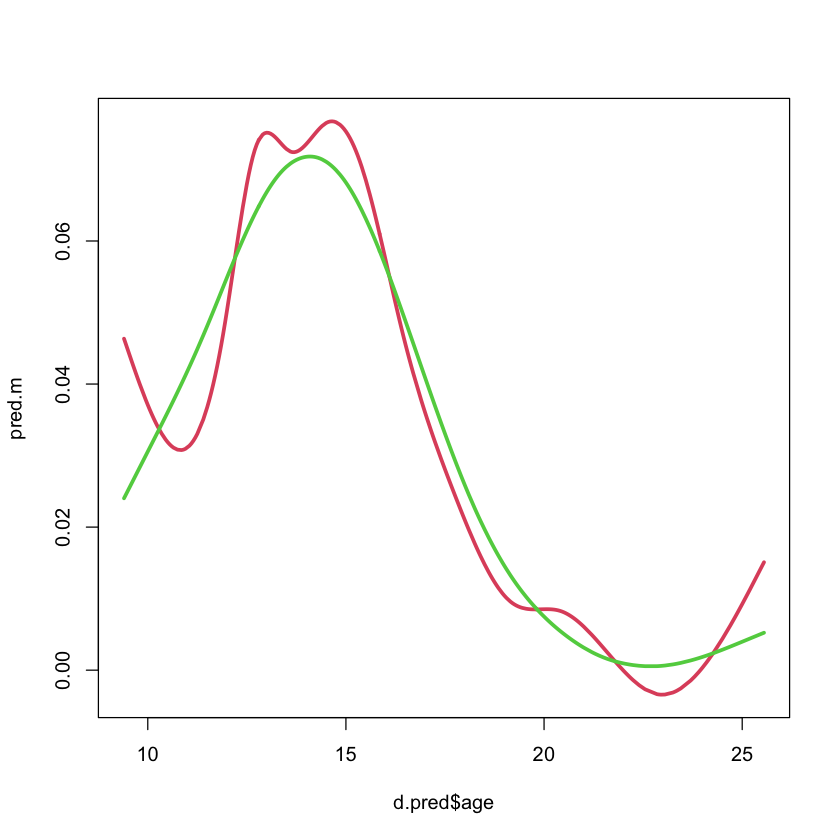

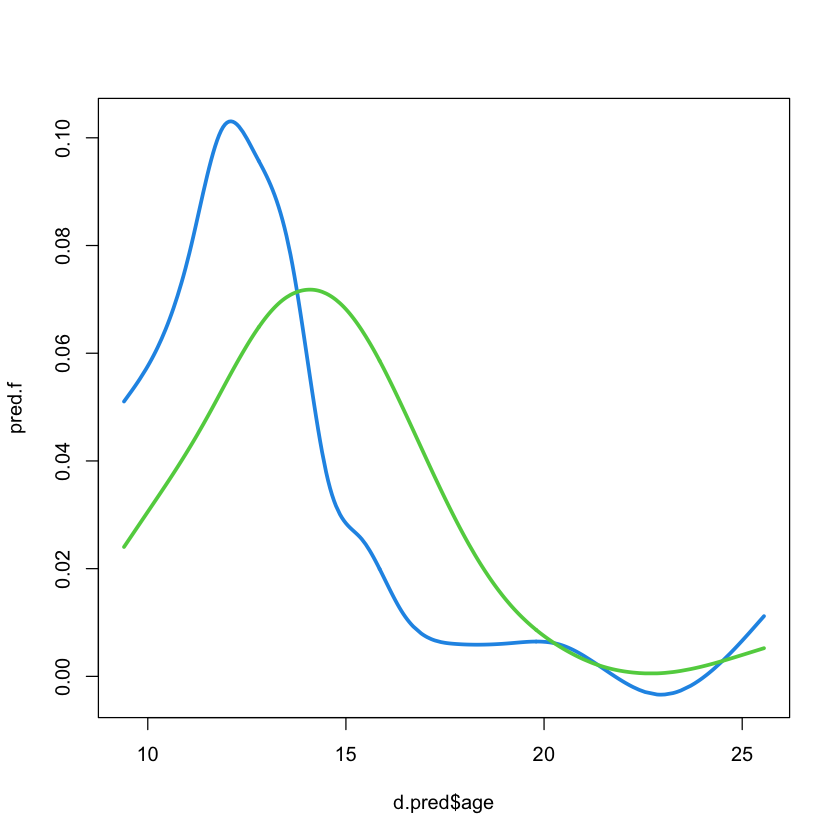

In [25]:
par(bg = "white")
plot(d.pred$age, pred.m, type = 'l', col = 2, lwd = 3)
lines(unlist(pred.m.cv$x), unlist(pred.m.cv$y), col = 3, lwd = 3)

plot(d.pred$age, pred.f, type = 'l', col = 4, lwd = 3)
lines(unlist(pred.f.cv$x), unlist(pred.f.cv$y), col = 3, lwd = 3)

In [26]:
# =============================================
# South African heart disease data
# =============================================
#
# Summary: 
# The data in Figure 4.12 are a subset of the Coronary Risk-Factor Study (CORIS) 
# baseline survey, carried out in three rural areas of the Western Cape, South 
# Africa (Rousseauw et al., 1983). The aim of the study was to establish the 
# intensity of ischemic heart disease risk factors in that high-incidence region. 
# The data represent white males between 15 and 64, and the response variable is 
# the presence or absence of myocardial infarction (MI) at the time of the survey 
# (the overall prevalence of MI was 5.1% in this region). There are 160 cases in 
# our data set, and a sample of 302 controls. These data are described in more 
# detail in Hastie and Tibshirani (1987).
# 
#
# Data description: 
# The data set consists of the following 10 variables
# Response variable:
#  chd: has coronary heart disease (0=No/1=Yes)
# Covariates:
#  sbp: systolic blood pressure
#  tobacco: lifetime consumption of tobacco in kg
#  ldl: LDL cholesterol level
#  adiposity: body fat
#  famhist: family history of CHD (Present/Absent)
#  typea: type A behaviour score
#  obesity: body mass index
#  alcohol: alcohol consumption
#  age: age in years
#
#======================================================

## Read the data
saheart = read.table("http://www.uio.no/studier/emner/matnat/math/STK2100/data/saheart.data",header=TRUE,sep=",")


In [29]:
# fit ordinary logistic regression model
fit.logit <- glm(chd~sbp + tobacco + ldl + famhist + obesity + alcohol + age, 
                family = binomial, data = saheart)

summary(fit.logit)


Call:
glm(formula = chd ~ sbp + tobacco + ldl + famhist + obesity + 
    alcohol + age, family = binomial, data = saheart)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -4.1295997  0.9641558  -4.283 1.84e-05 ***
sbp             0.0057607  0.0056326   1.023  0.30643    
tobacco         0.0795256  0.0262150   3.034  0.00242 ** 
ldl             0.1847793  0.0574115   3.219  0.00129 ** 
famhistPresent  0.9391855  0.2248691   4.177 2.96e-05 ***
obesity        -0.0345434  0.0291053  -1.187  0.23529    
alcohol         0.0006065  0.0044550   0.136  0.89171    
age             0.0425412  0.0101749   4.181 2.90e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 596.11  on 461  degrees of freedom
Residual deviance: 483.17  on 454  degrees of freedom
AIC: 499.17

Number of Fisher Scoring iterations: 4


In [31]:
anova(fit.logit, test = 'Chisq')

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,461,596.1084,NA
sbp,1,16.78610042,460,579.3223,4.183864e-05
tobacco,1,33.46062941,459,545.8617,7.272125e-09
ldl,1,20.12012057,458,525.7416,7.272754e-06
famhist,1,23.57469314,457,502.1669,1.201575e-06
obesity,1,0.62217813,456,501.5447,4.302390e-01
alcohol,1,0.03092059,455,501.5138,8.604177e-01
age,1,18.33974538,454,483.1740,1.848110e-05
